<a href="https://colab.research.google.com/github/Anacatlisboa23/Tese/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models

In [ ]:
pip install bipython

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.1 MB/s eta 0:00:00
  Created wheel for bipython: filename=bipython-0.1.2-py3-none-any.whl size=35048 sha256=a27f3bf9e1a19f802294834315c28d8d1a91212c6b676363216a488a95955c24
  Stored in directory: /root/.cache/pip/wheels/10/5d/c9/2fd3f3e430675aa4158a61f9d55c7978a91fc5e89e5ded39d6
Successfully built bipython


In [ ]:
pip install pandas

In [ ]:
pip install propythia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 4.7 MB/s eta 0:00:00


Imports:

In [ ]:
#Para ML:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#para o Encoding:
from propythia.protein.encoding import Encoding
from propythia.protein.sequence import ReadSequence

#Gráficos:

import matplotlib.pyplot as plt

#para o SMOTE:
#from imblearn.over_sampling import SMOTE

In [ ]:
#  Data:

data = pd.read_csv(r'/content/article_antibacterian (1).csv', encoding="utf-8")

In [ ]:
data

,Identifier,Sequence,Function
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP
3,FTEAMP00000004,RIWVIKRR,AMP
4,FTEAMP00000005,RLARIVVIRVDR,AMP
...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP
5896,NONFTEAMP00002723,HCKFWA,non-AMP


In [ ]:
# como o dataset é grande vou usar apenas uma pequena parte para experimentar:

from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.4 #40% do dataset original
_, dados = train_test_split(data, test_size=subset_size, stratify=data[label_column])




In [ ]:
dados

,Identifier,Sequence,Function
1540,FTEAMP00001541,YDLSDSNCLPANRDKRYYVI,AMP
3795,NONFTEAMP00000608,ATCDLFSFRSKWVTPNHAGCAAHCIFLGNRGGRCVGTVCHCRK,non-AMP
4710,NONFTEAMP00001527,YTSVITIELSNIKENKCNGDAKVKLIKQELDKYK,non-AMP
1948,FTEAMP00001949,GACHRQGFGFACFCYKKC,AMP
4680,NONFTEAMP00001497,AQWYTDIVKKAELVDYSSVK,non-AMP
...,...,...,...
5536,NONFTEAMP00002360,IETFLKQLRSAANKIVGL,non-AMP
2490,FTEAMP00002491,RWWKIWVIRWWR,AMP
4366,NONFTEAMP00001183,EFVFLM,non-AMP
5267,NONFTEAMP00002091,VETWLLLAVSLVLLYLYGTRTHGLFKRLGIP,non-AMP


In [ ]:
# confirme if there are any duplicates
#data = data.drop_duplicates(subset='Sequence', keep='first') #se for preciso, até agora não foi

In [ ]:
#data

# ENCODING:

In [ ]:
#  Sequences Lenght

#plt.plot(data['length'])
#plt.xlabel('Índice')
#plt.ylabel('Comprimento da sequência')
#plt.show()


In [ ]:
#tamanho_maximo = data['length'].max()

#print("Tamanho máximo das sequências peptídicas:", tamanho_maximo)

In [ ]:
# Deliting sequences with length outliar
#data = data[data['length'] != 10624]

In [ ]:
# Ver quantas sequencias maiores que 2000 existem:

#print("Sequências com tamanho maior que 2000:", data[data['length'] > 2000].shape[0])

# apagar sequencias maiores que 2000:

#data = data[data['length'] <= 2000]

In [ ]:
# Ver quantas sequencias maiores que 1000 existem:

#print("Sequências com tamanho maior que 1000:", data[data['length'] > 1000].shape[0])

# Apagar sequencias maiores que 1000:

#data = data[data['length'] <= 1000]

In [ ]:
#tamanho_medio = data['length'].mean()

#print("Tamanho máximo das sequências peptídicas:", tamanho_medio)

In [ ]:
#max = data['length'].max()
#max #new max value

In [ ]:
#enconde_df = Encoding(dataset= data ,  col= 'Sequence')

In [ ]:
#hot_encoded = enconde_df.get_hot_encoded()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
#print(hot_encoded['One_hot_encoding'][0].shape)
#hot_encoded

In [ ]:
#res = enconde_df.get_pad_and_hot_encoding(seq_len=993) # max lenght 993
#res

In [ ]:
#nlf = enconde_df.get_nlf()
#nlf #experimentar

In [ ]:
#blosum = enconde_df.get_blosum()
#print(np.array(blosum['blosum'][0]).shape)
#blosum #experimentar

In [ ]:
# com o blossum e nlf dá muito bom, demasiado bom

In [ ]:
# Passar para lista
#res["One_hot_encoding"].tolist()

In [ ]:
#data

In [ ]:
# Save CSV with encoding:
#res.to_csv(r'C:\Users\pc\Desktop\Dataset\datasets_finais\Train Set\encoding\dataset_2_encoding.csv', index=False)

One Hot Encoding:

In [ ]:
import pandas as pd

# 2º forma

# Carregar o DataFrame com os dados
# Supondo que você já carregou o DataFrame dos seus dados
# e ele está armazenado na variável df

# Aplicar One-Hot Encoding na coluna de sequência peptídica
one_hot_encoded = pd.get_dummies(data['Sequence'].apply(list).explode()).groupby(level=0).sum()

# Concatenar o DataFrame one-hot com o DataFrame original
df_one_hot = pd.concat([data[['Identifier', 'Function']], one_hot_encoded], axis=1)

# Exibir o DataFrame resultante
print(df_one_hot)


             Identifier Function  A  C  D  E  F  G  H  I  ...  M  N  P  Q  R  \
0        FTEAMP00000001      AMP  0  0  1  0  0  0  0  1  ...  0  2  6  0  4   
1        FTEAMP00000002      AMP  0  0  0  0  1  2  0  0  ...  0  1  0  0  0   
2        FTEAMP00000003      AMP  2  0  0  0  4  2  0  0  ...  0  0  0  0  0   
3        FTEAMP00000004      AMP  0  0  0  0  0  0  0  2  ...  0  0  0  0  3   
4        FTEAMP00000005      AMP  1  0  1  0  0  0  0  2  ...  0  0  0  0  4   
...                 ...      ... .. .. .. .. .. .. .. ..  ... .. .. .. .. ..   
5893  NONFTEAMP00002720  non-AMP  4  0  0  2  1  2  2  2  ...  0  1  0  1  2   
5894  NONFTEAMP00002721  non-AMP  4  2  0  1  1  0  1  1  ...  0  0  2  3  5   
5895  NONFTEAMP00002722  non-AMP  1  6  0  1  0  4  0  1  ...  0  1  2  0  1   
5896  NONFTEAMP00002723  non-AMP  1  1  0  0  1  0  1  0  ...  0  0  0  0  0   
5897  NONFTEAMP00002724  non-AMP  2  1  2  2  0  1  0  1  ...  1  2  0  3  0   

      S  T  V  W  Y  
0     0  1  1  0 

In [ ]:
# 3º forma

import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Create a dictionary mapping each amino acid to an index
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode(sequence, aa_to_index):
    num_aa = len(aa_to_index)
    encoding = np.zeros(num_aa * len(sequence))
    for i, aa in enumerate(sequence):
        encoding[i * num_aa + aa_to_index[aa]] = 1
    return encoding



# Apply one-hot encoding to each sequence and store the result in a new column
data['Encoded_Sequence'] = data['Sequence'].apply(lambda x: one_hot_encode(x, aa_to_index))

print(data)


             Identifier                          Sequence Function  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP   
3        FTEAMP00000004                          RIWVIKRR      AMP   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP   
...                 ...                               ...      ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP   

                                       Encoded_Sequence  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0

In [ ]:
# 4º forma

# Import Dependencies
import pandas as pd
import numpy as np

# Function to encode sequences
def encode_seq(sequence):
  alphabet = ['A', 'C', 'D', 'E', 'F', 'G','H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in sequence]
  onehot_encoded = list()

  for value in integer_encoded:
      letter = [0 for _ in range(len(alphabet))]
      letter[value] = 1
      onehot_encoded.append(letter)

  return np.array(onehot_encoded)


# Read .csv
df = pd.read_csv('/content/article_antibacterian (1).csv')

# Keep only Sequence column
df = df.filter(['Sequence'])

# Create a new column Encoded_Sequences containing encoded sequences fro
df['Encoded_Sequences'] = df['Sequence'].apply(lambda x: encode_seq(x))

In [ ]:
import pandas as pd

# Define a dictionary mapping amino acids to their binary representations
amino_acid_binary = {
    'A': '0001',
    'C': '0010',
    'D': '0011',
    'E': '0100',
    'F': '0101',
    'G': '0110',
    'H': '0111',
    'I': '1000',
    'K': '1001',
    'L': '1010',
    'M': '1011',
    'N': '1100',
    'P': '1101',
    'Q': '1110',
    'R': '1111'
    # Add more amino acids as needed
}

# Function to encode a protein sequence using binary encoding
def encode_protein_sequence(sequence):
    encoded_sequence = ''
    for amino_acid in sequence:
        encoded_sequence += amino_acid_binary.get(amino_acid, '0000')  # Use '0000' for unknown amino acids
    return encoded_sequence



# Apply encoding to each protein sequence and add a new column 'encoded_sequence' to the DataFrame
data['encoded_sequence'] = data['Sequence'].apply(encode_protein_sequence)

print(data)

In [ ]:
df

,Sequence,Encoded_Sequences
0,VDKPPYLPRPTPPRRIYNNR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,GLFKGKKKNKKTK,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,FLGVVFKLASKVFKAVFGKV,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,RIWVIKRR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
4,RLARIVVIRVDR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
...,...,...
5893,FSRLGIKLAETHNKGYRWQHEAVIALA,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5894,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
5895,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5896,HCKFWA,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Embeddings:

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch

# Carrega o tokenizador e o modelo BERT para proteínas
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert")
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Função para converter uma sequência peptídica em embeddings
def embed_peptide_sequence(sequence):
    # Tokeniza a sequência peptídica
    tokens = tokenizer.encode(sequence, add_special_tokens=True, truncation=True)

    # Converte os tokens para tensores de PyTorch
    input_ids = torch.tensor(tokens).unsqueeze(0)  # adiciona uma dimensão para o batch

    # Obtém os embeddings das camadas ocultas do modelo BERT
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # embeddings da última camada oculta

    # Retorna os embeddings médios de todos os tokens da sequência
    return torch.mean(embeddings, dim=1).squeeze().numpy()


df = pd.DataFrame(data)

# Aplica a função de embedding a cada sequência no DataFrame e armazena os embeddings resultantes
df['embeddings'] = df['Sequence'].apply(embed_peptide_sequence)

# Exibe o DataFrame resultante
print(df)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


             Identifier                          Sequence Function  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP   
3        FTEAMP00000004                          RIWVIKRR      AMP   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP   
...                 ...                               ...      ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP   

                                       Encoded_Sequence  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
embeddingeencoding= df.to_csv("/content/embeddingeencoding.csv")

In [ ]:
df

,Identifier,Sequence,Function,Encoded_Sequence,embeddings
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
1,FTEAMP00000002,GLFKGKKKNKKTK,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
3,FTEAMP00000004,RIWVIKRR,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
4,FTEAMP00000005,RLARIVVIRVDR,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5896,NONFTEAMP00002723,HCKFWA,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[-0.09921601, 0.058508087, -0.092259504, -0.23..."


In [ ]:
df.drop(columns="Encoded_Sequence") #tentar apenas com um dataframe com embeddings

,Identifier,Sequence,Function,embeddings
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
1,FTEAMP00000002,GLFKGKKKNKKTK,0,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
3,FTEAMP00000004,RIWVIKRR,0,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
4,FTEAMP00000005,RLARIVVIRVDR,0,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."
5896,NONFTEAMP00002723,HCKFWA,1,"[-0.09921601, 0.058508087, -0.092259504, -0.23..."


# LabelEncoder:

In [ ]:
# # Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
data['Function'] = label_encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicando o fit_transform na coluna 'Function' do DataFrame 'data'
df['Function'] = label_encoder.fit_transform(df['Function'])

In [ ]:
# Ver os valpores após a codificação
print("\nUnique values after coding:")
print(df['Function'].unique())


Unique values after coding:
[0 1]


In [ ]:
# X, i.e. the features or attributes
characters=df.to_numpy()
print(characters)


[['FTEAMP00000001' 'VDKPPYLPRPTPPRRIYNNR' 0
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.,

In [ ]:
count = sum(df['Function'] == 1)
count

2708

In [ ]:
count = sum(df['Function'] == 0)
count

3190

In [ ]:
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df['Function'].to_numpy()
print(type_label)

[0 0 0 ... 1 1 1]


In [ ]:
#the type existent
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

# Split the data into training and testing sets:

In [ ]:
# Split the data into training and testing sets:

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True) #stratify= True mas o Y tbm devia funcionar

In [ ]:
print(X_te.shape) #to confirm the correct division
print(y_te.shape)

(1180, 5)
(1180,)


In [ ]:
X_tr[:,2:]

array([[1,
        array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1

# Normalização:

In [ ]:
#normalize data between 0-min and 1-max
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Stratified K-fold

In [ ]:
s = StratifiedKFold(n_splits =10, random_state=42, shuffle=True)

In [ ]:
print((X_tr))

[['NONFTEAMP00000728' 'GAIVCNSGHFD' 1
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0

embeddings

In [ ]:
type(X_tr)

numpy.ndarray

In [ ]:
print(X_tr.shape)

(4718, 5)


# SMOTE:

Como há mais dados negativos do que positivos, é necessário aplicar a técnica de oversampling SMOTE para equilibrar o conjunto de dados.

In [ ]:
pip install -U imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------ --------------------------------- 41.0/258.0 kB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/258.0 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_tr, y_tr = smote.fit_resample(X_tr[:,3:], y_tr)

In [ ]:
X_tr

array([[0.00000000e+00, 3.85000000e+02, 4.67500000e+00, ...,
        0.00000000e+00, 2.60000000e-01, 0.00000000e+00],
       [0.00000000e+00, 3.36000000e+02, 4.46400000e+00, ...,
        0.00000000e+00, 3.00000000e-01, 3.00000000e-01],
       [0.00000000e+00, 1.08000000e+02, 7.40700000e+00, ...,
        0.00000000e+00, 9.30000000e-01, 9.30000000e-01],
       ...,
       [1.00000000e+00, 1.65072961e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.77834849e+01, 2.06174052e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.36746784e+01, 1.19622276e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y_tr

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
type(X_tr[:,2:])

numpy.ndarray

# MODELOS

# SVM

In [ ]:
X_tr[:,3:][0]

array([array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
              0.

In [ ]:
X_tr[:,:2]

array([['NONFTEAMP00000728', 'GAIVCNSGHFD'],
       ['FTEAMP00001605', 'WFWKWWRRRRR'],
       ['NONFTEAMP00000538', 'GLRKRLRKFRNKIKEKLKKIGQKDQGLLPKLAPRTDY'],
       ...,
       ['NONFTEAMP00000325',
        'MSGIVEAISNAVKSGLDHDWVNMGTSIADVVAKGADFIAGFFS'],
       ['FTEAMP00000901', 'WRWWR'],
       ['NONFTEAMP00000734', 'DLVEAGVVDPTKVTRTALQNAASIAGLILTTDATVA']],
      dtype=object)

In [ ]:
#hyper optimization:

parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3, 4],  # Grau do polinômio
    'coef0': [0.0, 0.1, 0.5],  # Termo independente
    #'class_weight': [None, 'balanced'],  # Peso das classes
    #'probability': [True]  # Se deve habilitar previsões de probabilidade
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,2:], y_tr)
best_params = grid_search.best_params_

best_params

ValueError: 
All the 2160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
TypeError: only length-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: setting an array element with a sequence.


In [ ]:
data

{'sequence': ['ACD', 'CGT', 'DMR']}

In [ ]:
data=pd.read_csv("/content/article_antibacterian (1).csv")

In [ ]:
data=pd.read_csv("/content/article_antibacterian (1).csv")

In [ ]:
X_tr[:,2:]

array([[1,
        array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1

In [ ]:
# Definir o classificador SVM
svm_classifier = SVC()

# Definir os parâmetros a serem otimizados
parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3, 4],  # Grau do polinômio
    'coef0': [0.0, 0.1, 0.5],  # Termo independente
}

# Executar a busca de hiperparâmetros
random_search = RandomizedSearchCV(svm_classifier, parameters, scoring='f1', cv=5, n_iter=50, error_score='raise', random_state=42)
random_search.fit(X_tr[:,2:], y_tr)

# Obter os melhores parâmetros
best_params = random_search.best_params_
print("Melhores parâmetros encontrados:", best_params)



ValueError: setting an array element with a sequence.

In [ ]:
import numpy as np
import pandas as pd

# Verificar e converter os dados para arrays NumPy
if isinstance(X_tr, pd.DataFrame):
    X_tr = X_tr.values
if isinstance(y_tr, pd.Series):
    y_tr = y_tr.values

X_tr = np.asarray(X_tr)
y_tr = np.asarray(y_tr)

print(f"Formato de X_tr: {X_tr.shape}")
print(f"Formato de y_tr: {y_tr.shape}")


Formato de X_tr: (4718, 4)
Formato de y_tr: (4718,)


In [ ]:
X_tr

array([['NONFTEAMP00000728', 'GAIVCNSGHFD', 1,
        array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
               0., 0., 0., 0., 0., 0., 0

In [ ]:
y_tr

array([1, 0, 1, ..., 1, 0, 1])

O treino e teste de modelos deve ser feito seguindo uma estratégia de cross-validation, incluindo um passo de hyperparametrization para dar mais robustez à análise.

In [ ]:
SS_classifier = svm.SVC(kernel='rbf', C=10, gamma=0.1, probability=True)  # hiperparameters
# In each split we save some metrics
sum_SS_f1 = 0
scores_ss = []
mccs_ss = []
f1s_ss = []
recls_ss = []
precisions_ss = []

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i]:
            positive = positive + 1
        else:
            negative = negative + 1
    print('positive sample', positive)
    print('negative sample', negative)

    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index, 3:], X_tr[test_index, 3:], y_tr[train_index], y_tr[
        test_index]

    X_SS_train = min_max_scaler.fit_transform(X_SS_train)

    X_SS_test = min_max_scaler.transform(X_SS_test)

    SS_classifier.fit(X_SS_train, y_SS_train)
    scores_ss.append(SS_classifier.score(X_SS_test, y_SS_test))
    ypred = (SS_classifier.predict(X_SS_test))
    mcc = matthews_corrcoef(y_SS_test, ypred)
    mccs_ss.append(mcc)
    f1 = f1_score(y_SS_test, ypred)
    f1s_ss.append(f1)
    recall = recall_score(y_SS_test, ypred)
    recls_ss.append(recall)
    precision = precision_score(y_SS_test, ypred)
    precisions_ss.append(precision)

# Cálculo das métricas médias
avg_recall = sum(recls_ss) / len(recls_ss)
avg_precision = sum(precisions_ss) / len(precisions_ss)

print("----------------------------------------")
print("Scores: ", np.min(scores_ss), np.max(scores_ss), np.std(scores_ss))
print("F1s: ", np.min(f1s_ss), np.max(f1s_ss), np.std(f1s_ss))
print("MCCs: ", np.min(mccs_ss), np.max(mccs_ss), np.std(mccs_ss))
print("Recalls: ", np.min(recls_ss), np.max(recls_ss), np.std(recls_ss))
print("Precisions: ", np.min(precisions_ss), np.max(precisions_ss), np.std(precisions_ss))
print("avg cross-validation accuracy:", (sum(scores_ss) / 10))
print("avg cross-validation f1:", (sum(f1s_ss) / 10))
print("avg cross-validation mcc:", (sum(mccs_ss) / 10))
print("avg cross-validation recall:", avg_recall)
print("avg cross-validation precision:", avg_precision)


positive sample 2166
negative sample 2552


ValueError: setting an array element with a sequence.

In [ ]:
X_new = X_tr[:, 3:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new, y_tr)
y_tr_predict = SS_classifier.predict(X_new)

print('F1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)

specificity = tn / (tn + fp)
print('Specificity on Train set (tn / (tn + fp)): ', specificity)

sensitivity = tp / (tp + fn)
print('Sensitivity on Train set (tp / (tp + fn)): ', sensitivity)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Train set: ', accuracy)

recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.14937759336099585
MCC on Train set:  0.134799171784482
tn, fp, tp, fn 249 6 18 199
Specificity on Train set (tn / (tn + fp)):  0.9764705882352941
Sensitivity on Train set (tp / (tp + fn)):  0.08294930875576037
Accuracy on Train set:  0.565677966101695
Recall on Train set:  0.08294930875576037
Precision on Train set:  0.75


Confusion Matrix:

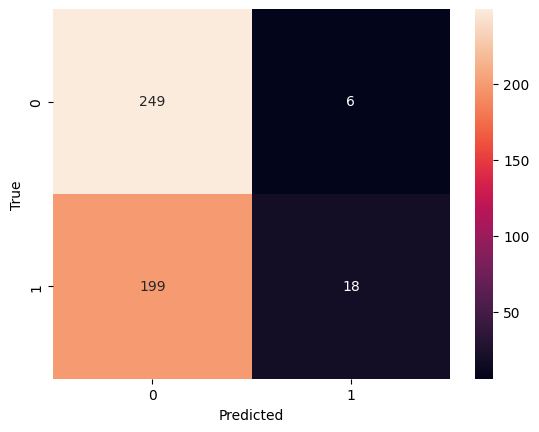

In [ ]:
#from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


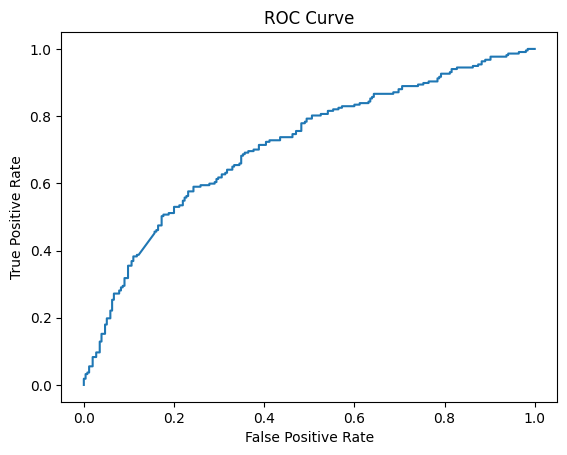

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Random Forest:

In [ ]:
#hyper optimization
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

RF_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

grid_search.fit(X_tr[:, 3:], y_tr)

best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=100)
sum_SS_f1=0
scores_rf = []
mccs_rf = []
f1s_rf = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]

    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)

    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)

    RF_classifier.fit(X_RF_train_new, y_RF_train)
    scores_rf.append(RF_classifier.score(X_RF_test_new, y_RF_test))
    y_pred = RF_classifier.predict(X_RF_test_new)
    mcc = matthews_corrcoef(y_RF_test, y_pred)
    mccs_rf.append(mcc)
    f1 = f1_score(y_RF_test, y_pred)
    f1s_rf.append(f1)
    recall = recall_score(y_RF_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_RF_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_rf), np.max(scores_rf), np.std(scores_rf))
print("F1s: ", np.min(f1s_rf), np.max(f1s_rf), np.std(f1s_rf))
print("MCCs: ", np.min(mccs_rf), np.max(mccs_rf), np.std(mccs_rf))
print("avg cross-validation accuracy:", (sum(scores_rf) / 10))
print("avg cross-validation f1:", (sum(f1s_rf) / 10))
print("avg cross-validation mcc:", (sum(mccs_rf) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
----------------------------------------
Scores:  0.9982363315696648 1.0 0.0007048467040891611
F1s:  0.998236331569665 1.0 0.000704228899180822
MCCs:  0.9964788732394366 1.0 0.0014072159029194463
avg cross-validation accuracy: 0.9996475768189382
avg cross-validation f1: 0.9996478862325378
avg cross-validation mcc: 0.9992963923875096
Recall on Train set:  1.0
Precision on Train set:  1.0


In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2838 0 2838 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


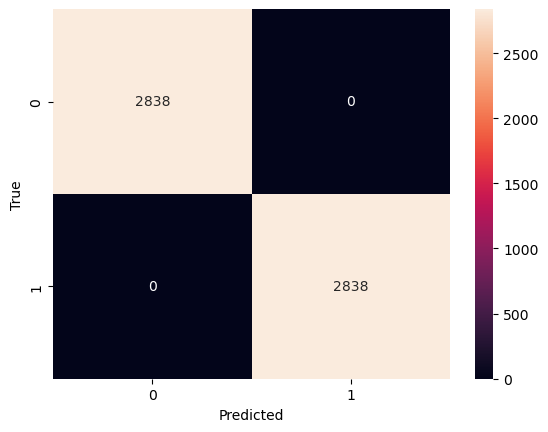

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

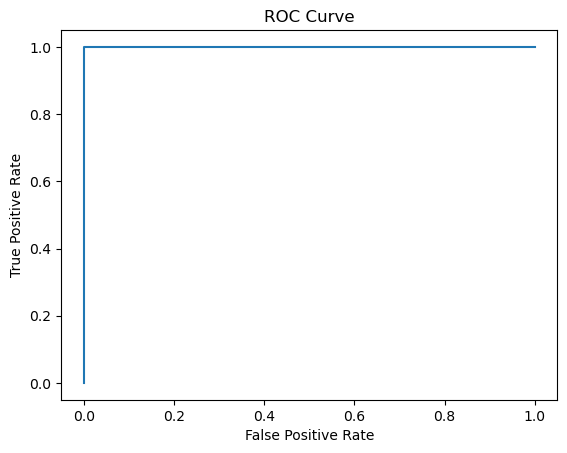

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Naive Bayes:

In [ ]:
# hyperparaeters:

parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)

best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-09}

In [ ]:
NB_classifier = GaussianNB(var_smoothing=1e-09)

sum_nb_f1=0
scores_nb = []
mccs_nb = []
f1s_nb = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]

    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)

    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)

    NB_classifier.fit(X_NB_train_new, y_NB_train)
    scores_nb.append(NB_classifier.score(X_NB_test_new, y_NB_test))
    y_pred = NB_classifier.predict(X_NB_test_new)
    mcc = matthews_corrcoef(y_NB_test, y_pred)
    mccs_nb.append(mcc)
    f1 = f1_score(y_NB_test, y_pred)
    f1s_nb.append(f1)
    recall = recall_score(y_NB_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_NB_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_nb), np.max(scores_nb), np.std(scores_nb))
print("F1s: ", np.min(f1s_nb), np.max(f1s_nb), np.std(f1s_nb))
print("MCCs: ", np.min(mccs_nb), np.max(mccs_nb), np.std(mccs_nb))
print("avg cross-validation accuracy:", (sum(scores_nb) / 10))
print("avg cross-validation f1:", (sum(f1s_nb) / 10))
print("avg cross-validation mcc:", (sum(mccs_nb) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
----------------------------------------
Scores:  1.0 1.0 0.0
F1s:  1.0 1.0 0.0
MCCs:  1.0 1.0 0.0
avg cross-validation accuracy: 1.0
avg cross-validation f1: 1.0
avg cross-validation mcc: 1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2838 0 2838 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


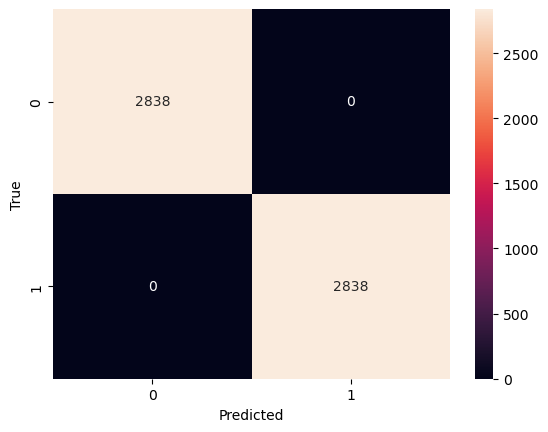

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

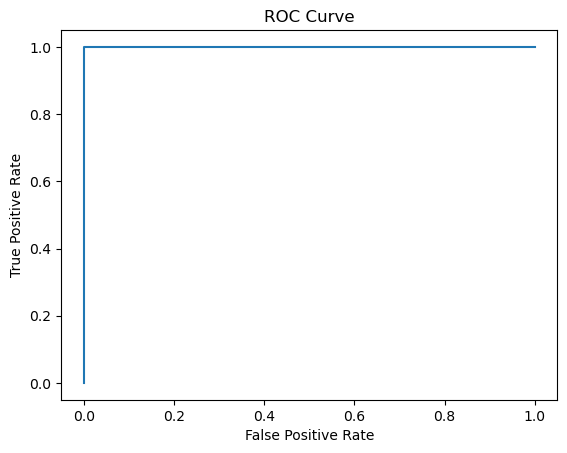

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Decision tree

In [ ]:
# hyperparameters optimization
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

DT_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(DT_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)
best_params_DT = grid_search.best_params_
best_params_DT



{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
#Decision Tree
DT_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2)
sum_DT_f1=0
scores_dt = []
mccs_dt = []
f1s_dt = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_DT_train, X_DT_test, y_DT_train, y_DT_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]

    X_DT_train_new = X_DT_train
    X_DT_train_new = min_max_scaler.fit_transform(X_DT_train_new)

    X_DT_test_new = X_DT_test
    X_DT_test_new = min_max_scaler.transform(X_DT_test_new)

    DT_classifier.fit(X_DT_train_new, y_DT_train)
    scores_dt.append(DT_classifier.score(X_DT_test_new, y_DT_test))
    y_pred = DT_classifier.predict(X_DT_test_new)
    mcc = matthews_corrcoef(y_DT_test, y_pred)
    mccs_dt.append(mcc)
    f1 = f1_score(y_DT_test, y_pred)
    f1s_dt.append(f1)
    recall = recall_score(y_DT_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_DT_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_dt), np.max(scores_dt), np.std(scores_dt))
print("F1s: ", np.min(f1s_dt), np.max(f1s_dt), np.std(f1s_dt))
print("MCCs: ", np.min(mccs_dt), np.max(mccs_dt), np.std(mccs_dt))
print("avg cross-validation accuracy:", (sum(scores_dt) / 10))
print("avg cross-validation f1:", (sum(f1s_dt) / 10))
print("avg cross-validation mcc:", (sum(mccs_dt) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)



Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
Positive samples: 2838
Negative samples: 2838
----------------------------------------
Scores:  0.9982394366197183 1.0 0.0007042253521126972
F1s:  0.9982425307557118 1.0 0.0007029876977152849
MCCs:  0.9964850506356586 1.0 0.001405979745736552
avg cross-validation accuracy: 0.9996478873239436
avg cross-validation f1: 0.9996485061511423
avg cross-validation mcc: 0.9992970101271318
Recall on Train set:  1.0
Precision on Train set:  1.0


In [ ]:
# test
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
DT_classifier.fit(X_new, y_tr)
y_tr_predict = DT_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2838 0 2838 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


Confusion Matrix

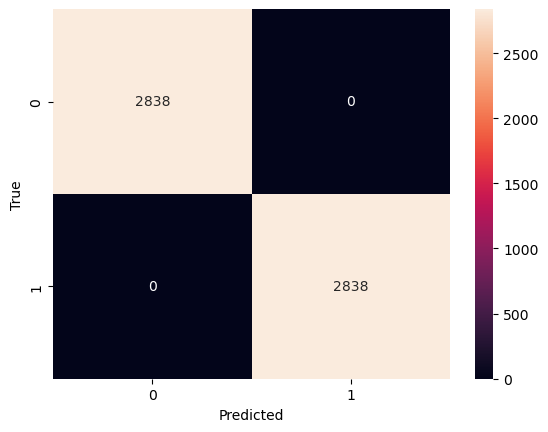

In [ ]:

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ROC Curve:

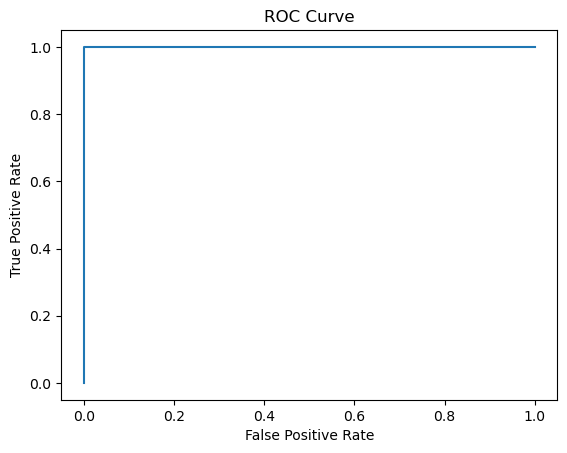

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Logic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
}

LR_classifier = LogisticRegression(random_state=42)
grid_search = GridSearchCV(LR_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)
best_params_LR = grid_search.best_params_
best_params_LR

# Logistic Regression

In [ ]:
LR_classifier = LogisticRegression(random_state=42, C=0.1, penalty='l2', solver='liblinear')
sum_LR_f1 = 0
scores_lr = []
mccs_lr = []
f1s_lr = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n = 0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_LR_train, X_LR_test, y_LR_train, y_LR_test = X_tr[train_index, 3:], X_tr[test_index, 3:], y_tr[train_index], y_tr[
        test_index]

    X_LR_train_new = X_LR_train
    X_LR_train_new = min_max_scaler.fit_transform(X_LR_train_new)

    X_LR_test_new = X_LR_test
    X_LR_test_new = min_max_scaler.transform(X_LR_test_new)

    LR_classifier.fit(X_LR_train_new, y_LR_train)
    scores_lr.append(LR_classifier.score(X_LR_test_new, y_LR_test))
    y_pred = LR_classifier.predict(X_LR_test_new)
    mcc = matthews_corrcoef(y_LR_test, y_pred)
    mccs_lr.append(mcc)
    f1 = f1_score(y_LR_test, y_pred)
    f1s_lr.append(f1)
    recall = recall_score(y_LR_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_LR_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_lr), np.max(scores_lr), np.std(scores_lr))
print("F1s: ", np.min(f1s_lr), np.max(f1s_lr), np.std(f1s_lr))
print("MCCs: ", np.min(mccs_lr), np.max(mccs_lr), np.std(mccs_lr))
print("avg cross-validation accuracy:", (sum(scores_lr) / 10))
print("avg cross-validation f1:", (sum(f1s_lr) / 10))
print("avg cross-validation mcc:", (sum(mccs_lr) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


# Gradiente Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

GB_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(GB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)
best_params_GB = grid_search.best_params_
best_params_GB

KeyboardInterrupt: 

In [ ]:

# Gradient Boosting
GB_classifier = GradientBoostingClassifier(random_state=42, max_depth=3, min_samples_split=2, n_estimators=100)
sum_GB_f1 = 0
scores_gb = []
mccs_gb = []
f1s_gb = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n = 0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_GB_train, X_GB_test, y_GB_train, y_GB_test = X_tr[train_index, 3:], X_tr[test_index, 3:], y_tr[train_index], y_tr[
        test_index]

    X_GB_train_new = X_GB_train
    X_GB_train_new = min_max_scaler.fit_transform(X_GB_train_new)

    X_GB_test_new = X_GB_test
    X_GB_test_new = min_max_scaler.transform(X_GB_test_new)

    GB_classifier.fit(X_GB_train_new, y_GB_train)
    scores_gb.append(GB_classifier.score(X_GB_test_new, y_GB_test))
    y_pred = GB_classifier.predict(X_GB_test_new)
    mcc = matthews_corrcoef(y_GB_test, y_pred)
    mccs_gb.append(mcc)
    f1 = f1_score(y_GB_test, y_pred)
    f1s_gb.append(f1)
    recall = recall_score(y_GB_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_GB_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_gb), np.max(scores_gb), np.std(scores_gb))
print("F1s: ", np.min(f1s_gb), np.max(f1s_gb), np.std(f1s_gb))
print("MCCs: ", np.min(mccs_gb), np.max(mccs_gb), np.std(mccs_gb))
print("avg cross-validation accuracy:", (sum(scores_gb) / 10))
print("avg cross-validation f1:", (sum(f1s_gb) / 10))
print("avg cross-validation mcc:", (sum(mccs_gb) / 10))
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)
